# 1. EDA and Data Cleaning

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

> Personal data have been removed, province names have also been encoded to protect patients privacy.

In [5]:
hbp = pd.read_csv("../data/high_blood_pressure_VN_2020.csv")
hbp.info()
hbp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   survey_time                 18536 non-null  object 
 1   survey_year                 20768 non-null  float64
 2   birth_year                  20555 non-null  object 
 3   gender                      20770 non-null  int64  
 4   body_height                 19808 non-null  float64
 5   body_weight                 19860 non-null  float64
 6   smoker                      19993 non-null  float64
 7   high_blood_pressure         20770 non-null  int64  
 8   under_treatment             19953 non-null  float64
 9   lipid                       19448 non-null  float64
 10  diabetes                    19681 non-null  float64
 11  systolic_blood_pressure_1   20737 non-null  float64
 12  diastolic_blood_pressure_1  20739 non-null  float64
 13  heart_rate_1                206

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc
0,19/2/2020,2020.0,1963,1,NaN,NaN,1.0,0,NaN,NaN,NaN,130.0,70.0,78.0,120.0,80.0,78.0,0
1,01/01/2020,2020.0,1949,1,160.0,50.0,0.0,0,0.0,0.0,0.0,124.0,70.0,68.0,120.0,70.0,72.0,0
2,12/12/2018,2018.0,2001,1,165.0,52.0,0.0,0,0.0,0.0,0.0,100.0,60.0,90.0,110.0,70.0,90.0,0
3,01/01/2020,2020.0,1960,1,160.0,63.0,0.0,1,1.0,0.0,0.0,130.0,79.0,87.0,123.0,74.0,87.0,0
4,01/01/2020,2020.0,1950,1,164.0,61.0,0.0,0,0.0,0.0,0.0,118.0,86.0,73.0,110.0,60.0,80.0,0


In [6]:
hbp.isna().sum().sort_values(ascending=False)

survey_time                   2234
heart_rate_2                  2218
lipid                         1322
diabetes                      1089
systolic_blood_pressure_2     1017
diastolic_blood_pressure_2    1017
body_height                    962
body_weight                    910
under_treatment                817
smoker                         777
birth_year                     215
heart_rate_1                   157
systolic_blood_pressure_1       33
diastolic_blood_pressure_1      31
survey_year                      2
gender                           0
high_blood_pressure              0
province_enc                     0
dtype: int64

## 1.1. Fix birth_year and Calculate Age

In [7]:
#survey time doesn't have the correct dtype, but we won't use this column
#we will only need the survey_year and the birth_year to calculate the age

In [8]:
#birth_year should be 4 digits
hbp["birth_year"].str.len().value_counts()

4.0     20553
10.0        2
Name: birth_year, dtype: int64

In [9]:
#those with 10 digits include month, date
hbp[hbp["birth_year"].str.len()==10]

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc
5010,04/12/2019,2019.0,04/29/1905,1,160.0,56.0,1.0,1,1.0,0.0,0.0,141.0,81.0,87.0,136.0,80.0,89.0,6
8256,09/12/2019,2019.0,04/19/1905,2,150.0,42.0,0.0,0,0.0,3.0,1.0,138.0,94.0,89.0,130.0,80.0,87.0,6


In [10]:
#use year only
hbp["birth_year"].replace('04/29/1905', '1905', inplace = True)
hbp["birth_year"].replace('04/19/1905', '1905', inplace = True)

In [11]:
#double check
hbp["birth_year"].str.len().value_counts()

4.0    20555
Name: birth_year, dtype: int64

In [12]:
#convert to float, can't use int because there are NaN
hbp["birth_year"] = hbp["birth_year"].astype(float)

In [13]:
#calculate age
hbp["age"] = hbp["survey_year"] - hbp["birth_year"]

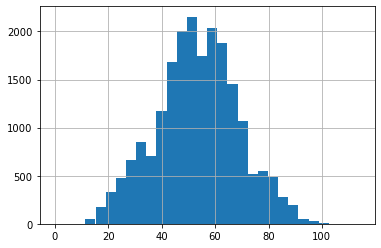

In [14]:
#age distribution
#near normal distribution, avg. age is ~55
hbp["age"].hist(bins = 30);

## 2.2. Gender

In [15]:
hbp["gender"].value_counts()
#from original data 1 is male, 2 is female
#might need to change to 0 and 1 later

2    12375
1     8395
Name: gender, dtype: int64

In [16]:
hbp["gender"].value_counts(normalize = True)
#60% female, 40% male

2    0.595811
1    0.404189
Name: gender, dtype: float64

## 2.3. Body height (in cm)

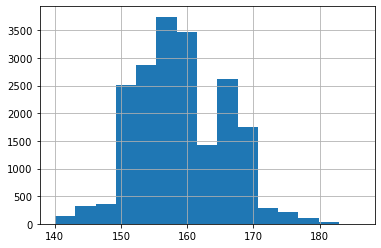

In [17]:
hbp["body_height"].hist(bins=15);
#mean around 160 cm or 5'3"

## 2.4. Body weight (in kg)

In [18]:
hbp["body_weight"].value_counts().sort_index()
#body_weight of 3 kg or 7 lb, probably a mistake
#let's replace it with the mean

3.0      1
32.0    12
32.5     1
33.0     5
34.0    15
        ..
89.0     2
90.0     3
91.0     1
93.0     1
98.0     1
Name: body_weight, Length: 114, dtype: int64

In [19]:
(hbp["body_weight"]).mean()

54.51700402842788

In [20]:
hbp["body_weight"].replace(3.0, 54.5, inplace = True)

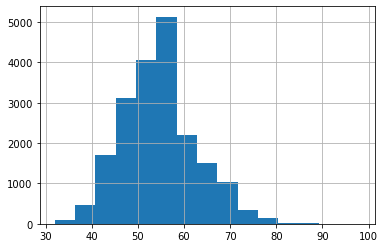

In [21]:
#body_weight distribution
#a little right skewed
#mean around 55 kg or 120 lb
hbp["body_weight"].hist(bins=15);

## 2.5. Smoker

In [22]:
hbp["smoker"].value_counts()

0.0    16365
1.0     3590
3.0       37
2.0        1
Name: smoker, dtype: int64

In [23]:
#0 is non-smoker, 1 is smoker
#why 2 and 3?

## 2.6. High blood pressure

In [24]:
hbp["high_blood_pressure"].value_counts()

0    15862
1     4741
3      166
2        1
Name: high_blood_pressure, dtype: int64

In [25]:
#0 means no high blood pressure
#1 means high blood pressure
#why 2 and 3?

## 2.7. Under_treatment

In [26]:
hbp["under_treatment"].value_counts()

0.0    15474
1.0     4359
3.0      119
2.0        1
Name: under_treatment, dtype: int64

In [27]:
#float because there are NaN
#0.0 means currently not under treament
#1.0 means currently receiving treatment
#why 2.0 and 3.0?

In [28]:
len(hbp[(hbp["high_blood_pressure"]==1) & (hbp["under_treatment"]==1.0)])
#most people with high blood pressure are receiving treament

4132

## 2.8. Lipid

In [29]:
hbp["lipid"].value_counts()

0.0    16325
3.0     1795
1.0     1328
Name: lipid, dtype: int64

In [30]:
#not exactly sure about his indicator
#0.0 probably means normal blood lipid level
#1.0 and 3.0 means elevated levels

## 2.9. Diabetes

In [31]:
hbp["diabetes"].value_counts()

0.0    16776
1.0     1555
3.0     1350
Name: diabetes, dtype: int64

In [32]:
#float because of NaN
#0 means no diabete
#1 means having diabete
#why 3?

## 2.10. Systolic blood pressure 1

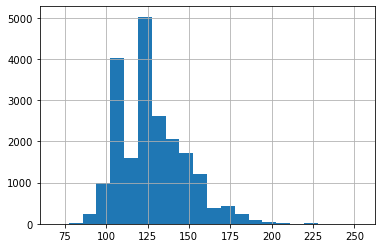

In [33]:
hbp["systolic_blood_pressure_1"].hist(bins=22);
#look reasonable

## 2.11. Diastolic blood pressure 1

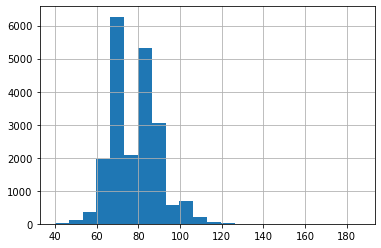

In [34]:
hbp["diastolic_blood_pressure_1"].hist(bins=22);

In [35]:
hbp[hbp["diastolic_blood_pressure_1"] > hbp["systolic_blood_pressure_1"]]
#there might be something wrong the first set of pressure in this case
#the second set looks normal

,survey_time,survey_year,birth_year,gender,body_height,body_weight,smoker,high_blood_pressure,under_treatment,lipid,diabetes,systolic_blood_pressure_1,diastolic_blood_pressure_1,heart_rate_1,systolic_blood_pressure_2,diastolic_blood_pressure_2,heart_rate_2,province_enc,age
8727,01/01/2020,2020.0,1983.0,2,153.0,59.0,0.0,0,0.0,0.0,0.0,126.0,136.0,90.0,120.0,70.0,75.0,14,37.0


## 2.12. Heart Rate 1

In [36]:
hbp["heart_rate_1"].value_counts().sort_index(ascending=False).head(10)
#heart rates over 400 look odd

12183.0    1
984.0      1
820.0      1
763.0      1
582.0      1
403.0      1
175.0      1
160.0      1
148.0      1
145.0      1
Name: heart_rate_1, dtype: int64

In [37]:
hbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   survey_time                 18536 non-null  object 
 1   survey_year                 20768 non-null  float64
 2   birth_year                  20555 non-null  float64
 3   gender                      20770 non-null  int64  
 4   body_height                 19808 non-null  float64
 5   body_weight                 19860 non-null  float64
 6   smoker                      19993 non-null  float64
 7   high_blood_pressure         20770 non-null  int64  
 8   under_treatment             19953 non-null  float64
 9   lipid                       19448 non-null  float64
 10  diabetes                    19681 non-null  float64
 11  systolic_blood_pressure_1   20737 non-null  float64
 12  diastolic_blood_pressure_1  20739 non-null  float64
 13  heart_rate_1                206

In [38]:
#remove 6 records with extremly high heart_rate_1
heart_rate_1_normal = ~(hbp["heart_rate_1"] > 400)
hbp = hbp[heart_rate_1_normal]

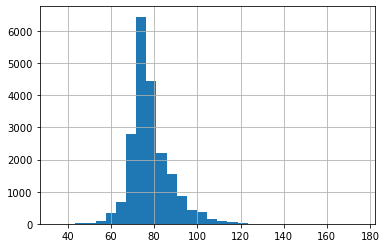

In [39]:
hbp["heart_rate_1"].hist(bins=30);
#heart_rate_1 distribution

## 2.13. Systolic blood pressure 2

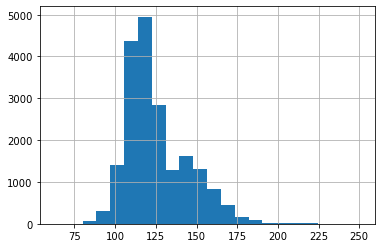

In [40]:
hbp["systolic_blood_pressure_2"].hist(bins=22);
#look reasonable

## 2.14. Diastolic blood pressure 2

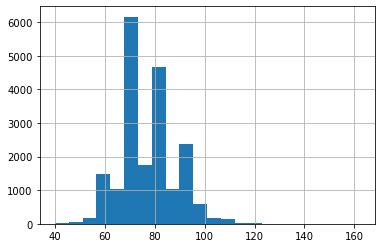

In [41]:
hbp["diastolic_blood_pressure_2"].hist(bins=22);
#look reasonable

## 2.15. Heart Rate 2

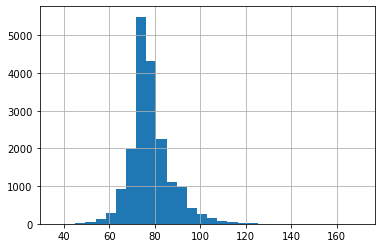

In [42]:
hbp["heart_rate_2"].hist(bins=30);
#heart_rate_2 distribution

# 2. Correlations

In [43]:
feats = ['age',
         'gender',
         'body_height',
         'body_weight',
         'smoker',
         'under_treatment',
         'lipid',
         'diabetes',
         'systolic_blood_pressure_1',
         'diastolic_blood_pressure_1',
         'heart_rate_1',
         'systolic_blood_pressure_2',
         'diastolic_blood_pressure_2',
         'heart_rate_2',
         'high_blood_pressure']

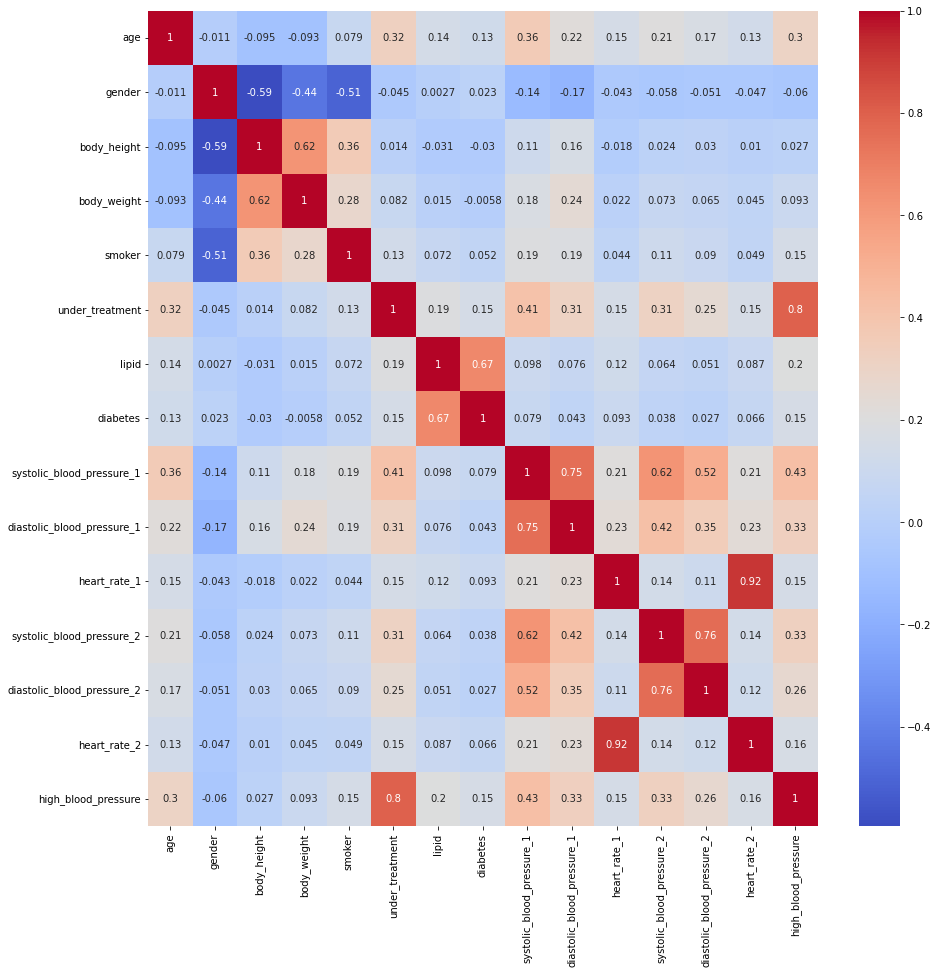

In [44]:
plt.figure(figsize = (15,15))
sns.heatmap(hbp[feats].corr(), cmap="coolwarm", annot=True);

> We are interested in:
> - predicting if a person has high blood pressure or not (classification).
> - predicting the blood pressure and heart rate.

# 3. High Blood Pressure Predictions

> For this prediction we should NOT use information about blood pressures. It is probably ok to use the heart rates
>
> The under_treatment column should NOT be used either, because all most all people with high blood pressure are receiving treament

In [45]:
hbp["high_blood_pressure"].value_counts()

0    15858
1     4739
3      166
2        1
Name: high_blood_pressure, dtype: int64

> Since we are not sure about the values 2 and 3, let's drop them

In [46]:
hbp.shape

(20764, 19)

In [47]:
hbp = hbp[hbp["high_blood_pressure"] <= 1]
hbp.shape
#167 records have been removed

(20597, 19)

In [48]:
hbp["high_blood_pressure"].value_counts(normalize = True)

0    0.769918
1    0.230082
Name: high_blood_pressure, dtype: float64

In [49]:
X_feats = ['age',
           'gender',
           'body_height',
           'body_weight',
           'smoker',
           'lipid',
           'diabetes',
           'heart_rate_1',
           'heart_rate_2']

In [50]:
X = hbp[X_feats]
y = hbp["high_blood_pressure"]
X.shape, y.shape

((20597, 9), (20597,))

## 3.1. Baseline Model

In [51]:
X.isna().sum()

age              217
gender             0
body_height      956
body_weight      904
smoker           753
lipid           1315
diabetes        1082
heart_rate_1     155
heart_rate_2    2171
dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15447, 9), (5150, 9), (15447,), (5150,))

In [53]:
si = SimpleImputer(strategy="mean")
ss = StandardScaler()
dummy = DummyClassifier()
logreg = LogisticRegression(max_iter = 10_000)

In [54]:
#Baseline model
steps0 = [("imp", si), ("sc", ss), ("clf", dummy)]
model0 = Pipeline(steps = steps0)
model0.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('clf', DummyClassifier())])

In [55]:
model0.score(X_test, y_test).round(3)
#baseline accuracy
#77% don't have high blood pressure

0.77

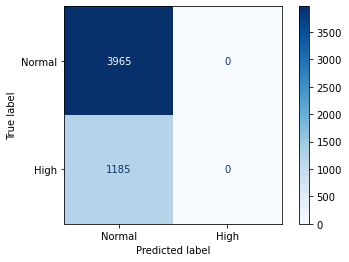

In [56]:
ConfusionMatrixDisplay.from_estimator(model0, X_test, y_test, cmap="Blues", display_labels=["Normal", "High"]);

In [57]:
balanced_accuracy_score(y_test, model0.predict(X_test)).round(3)

0.5

## 3.2. Logistic Regression Model

In [58]:
steps1 = [("imp", si), ("sc", ss), ("clf", logreg)]
model1 = Pipeline(steps = steps1)
model1.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('clf', LogisticRegression(max_iter=10000))])

In [89]:
model1.score(X_train, y_train).round(3), model1.score(X_test, y_test).round(3)
#about the same as the baseline accuracy

(0.787, 0.781)

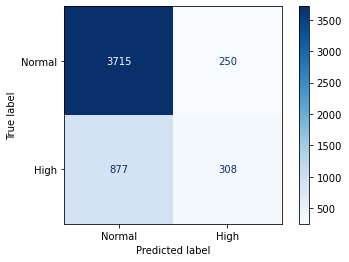

In [60]:
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test, cmap="Blues", display_labels=["Normal", "High"]);

In [118]:
balanced_accuracy_score(y_train, model1.predict(X_train)).round(3), balanced_accuracy_score(y_test, model1.predict(X_test)).round(3)
#train and test are about the same
#higher than the baseline model which is 0.5

(0.602, 0.598)

## 3.3. kNN Model

In [62]:
knn = KNeighborsClassifier()
steps2 = [("imp", si), ("sc", ss), ("clf", knn)]
model2 = Pipeline(steps = steps2)
model2.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('clf', KNeighborsClassifier())])

In [90]:
model2.score(X_train, y_train).round(3), model2.score(X_test, y_test).round(3)

(0.846, 0.78)

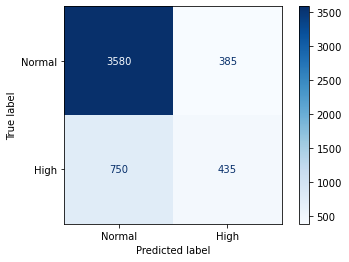

In [64]:
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, cmap="Blues", display_labels=["Normal", "High"]);

In [119]:
balanced_accuracy_score(y_train, model2.predict(X_train)).round(3), balanced_accuracy_score(y_test, model2.predict(X_test)).round(3)
#train score is 10 points higher
#higher than the baseline model which is 0.5

(0.737, 0.635)

## 3.4. Random Forest

In [66]:
rfc = RandomForestClassifier()
steps3 = [("imp", si), ("sc", ss), ("clf", rfc)]
model3 = Pipeline(steps = steps3)
model3.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('clf', RandomForestClassifier())])

In [91]:
model3.score(X_train, y_train).round(3), model3.score(X_test, y_test).round(3)
#this model is overfit

(0.999, 0.797)

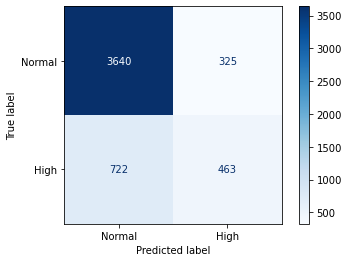

In [68]:
ConfusionMatrixDisplay.from_estimator(model3, X_test, y_test, cmap="Blues", display_labels=["Normal", "High"]);

In [120]:
balanced_accuracy_score(y_train, model3.predict(X_train)).round(3), balanced_accuracy_score(y_test, model3.predict(X_test)).round(3)
#overfit
#higher than the baseline model which is 0.5

(0.998, 0.654)

## 3.5. AdaBoost

In [70]:
abc = AdaBoostClassifier()
steps4 = [("imp", si), ("sc", ss), ("clf", abc)]
model4 = Pipeline(steps = steps4)
model4.fit(X_train, y_train)

Pipeline(steps=[('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('clf', AdaBoostClassifier())])

In [92]:
model4.score(X_train, y_train).round(3), model4.score(X_test, y_test).round(3)

(0.802, 0.796)

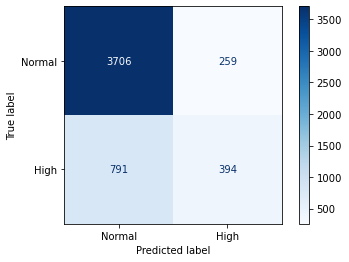

In [72]:
ConfusionMatrixDisplay.from_estimator(model4, X_test, y_test, cmap="Blues", display_labels=["Normal", "High"]);

In [121]:
balanced_accuracy_score(y_train, model4.predict(X_train)).round(3), balanced_accuracy_score(y_test, model4.predict(X_test)).round(3)
#train and test are about the same
#higher than the baseline model which is 0.5

(0.642, 0.634)

# 4. High Blood Pressure Predictions with Imbalance

## 4.1. Over Sampling the Minority Class

In [95]:
#resample the least populated class (funtional needs repair) to 10_000 observations (up from 3_238)
ros = RandomOverSampler(random_state=42)

steps5 = [("ros", ros), ("imp", si), ("sc", ss), ("clf", rfc)]   #use Random Forest Classifier
model5 = ImbPipeline(steps = steps5)

In [96]:
params = {'ros__sampling_strategy': [0.5, 0.75, 1.0],
          'clf__n_estimators': [50, 100, 150],
          'clf__max_features': ["sqrt", "log2"]}

gs5 = GridSearchCV(estimator = model5,
                   param_grid = params,
                   n_jobs=-1,
                   scoring='balanced_accuracy')

In [97]:
gs5.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('imp', SimpleImputer()),
                                       ('sc', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_features': ['sqrt', 'log2'],
                         'clf__n_estimators': [50, 100, 150],
                         'ros__sampling_strategy': [0.5, 0.75, 1.0]},
             scoring='balanced_accuracy')

In [98]:
gs5.best_estimator_
#sample_strategy = 1.0 means oversampling the minority class until the data is balanced
#max_features = "log2" for random forest

Pipeline(steps=[('ros',
                 RandomOverSampler(random_state=42, sampling_strategy=1.0)),
                ('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('clf', RandomForestClassifier(max_features='log2'))])

In [122]:
gs5.score(X_train, y_train).round(3), gs5.score(X_test, y_test).round(3)
#overfit, because we are using random forest, the same behavior as seen in section 3.4
#this is balance accuracy score

(0.999, 0.684)

In [100]:
accuracy_score(y_train, gs5.predict(X_train)).round(3), accuracy_score(y_test, gs5.predict(X_test)).round(3)
#still overfitting

(0.999, 0.787)

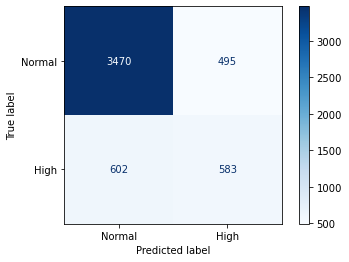

In [101]:
ConfusionMatrixDisplay.from_estimator(gs5, X_test, y_test, cmap="Blues", display_labels=["Normal", "High"]);

In [102]:
round(3470/3965,3), round(583/1185, 3), round((3470/3965 + 583/1185)/2, 3) #correct predictiton / all actual

(0.875, 0.492, 0.684)

In [103]:
round(583/1078, 3)  #precision in predicting the "high" class

0.541

In [104]:
round(583/1185, 3)  #sensitivity in predicting "high" class

0.492

### 4.1.1. Make Random Forest Less Overfit

In [107]:
#resample the least populated class (funtional needs repair) to 10_000 observations (up from 3_238)
ros = RandomOverSampler(random_state=42)

steps6 = [("ros", ros), ("imp", si), ("sc", ss), ("clf", rfc)]   #same as model5, use 6 just for clarity
model6 = ImbPipeline(steps = steps6)

In [108]:
#search on max_depth, and min_samples_leaf
#try to make it less overfit
params = {'ros__sampling_strategy': [1.0],
          'clf__n_estimators': [100],
          'clf__max_features': ["log2"],
          'clf__max_depth': [3, 6, 9, 12],
          'clf__min_samples_leaf': [1, 2, 3, 4, 5]}

gs6 = GridSearchCV(estimator = model6,
                   param_grid = params,
                   n_jobs=-1,
                   scoring='balanced_accuracy')

In [109]:
gs6.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('imp', SimpleImputer()),
                                       ('sc', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [3, 6, 9, 12],
                         'clf__max_features': ['log2'],
                         'clf__min_samples_leaf': [1, 2, 3, 4, 5],
                         'clf__n_estimators': [100],
                         'ros__sampling_strategy': [1.0]},
             scoring='balanced_accuracy')

In [110]:
gs6.best_estimator_

Pipeline(steps=[('ros',
                 RandomOverSampler(random_state=42, sampling_strategy=1.0)),
                ('imp', SimpleImputer()), ('sc', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=9, max_features='log2',
                                        min_samples_leaf=4))])

In [112]:
gs6.score(X_train, y_train).round(3), gs6.score(X_test, y_test).round(3)
#this is balance accuracy score

(0.786, 0.74)

In [113]:
accuracy_score(y_train, gs6.predict(X_train)).round(3), accuracy_score(y_test, gs6.predict(X_test)).round(3)
#no more overfitting

(0.764, 0.733)

> No overfitting
>
> Improved balance accuracy score on the test set
>
> Accuracy is a little below baseline accuracy

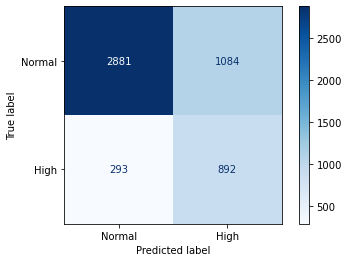

In [114]:
ConfusionMatrixDisplay.from_estimator(gs6, X_test, y_test, cmap="Blues", display_labels=["Normal", "High"]);

In [115]:
round(2881/3965,3), round(892/1185, 3), round((2881/3965 + 892/1185)/2, 3) #correct predictiton / all actual

(0.727, 0.753, 0.74)

In [116]:
round(892/1976, 3)  #precision in predicting the "high" class

0.451

In [117]:
round(892/1185, 3)  #sensitivity in predicting "high" class

0.753

### 4.1.2. Random Forest Feature Importances

In [130]:
feat_imp = (gs6.best_estimator_.named_steps.clf.feature_importances_).round(3)
feat_imp

array([0.471, 0.008, 0.044, 0.074, 0.035, 0.112, 0.086, 0.083, 0.087])

In [128]:
X_feats

['age',
 'gender',
 'body_height',
 'body_weight',
 'smoker',
 'lipid',
 'diabetes',
 'heart_rate_1',
 'heart_rate_2']

In [143]:
pd.DataFrame(data = {"feature": X_feats, "imp": feat_imp}).sort_values(by = "imp", ascending = False)

,feature,imp
0,age,0.471
5,lipid,0.112
8,heart_rate_2,0.087
6,diabetes,0.086
7,heart_rate_1,0.083
3,body_weight,0.074
2,body_height,0.044
4,smoker,0.035
1,gender,0.008
